<a href="https://colab.research.google.com/github/charanhu/Skin_Cancer_Detection_MNIST/blob/main/Skin_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Skin_Cancer_Detection using CNN

## The dataset consists of 10015 dermatoscopic images which can serve as a training set for academic machine learning purposes. The objective to build deep learning model to classify given query image into one of the 7 different classes of skin cancer.

#### Sourses:
Data: https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000

This the HAM10000 ("Human Against Machine with 10000 training images") dataset.It consists of 10015 dermatoscopicimages which are released as a training set for academic machine learning purposes and are publiclyavailable through the ISIC archive. This benchmark dataset can be used for machine learning and for comparisons with human experts.

It has 7 different classes of skin cancer which are listed below :
1. Melanocytic nevi
2. Melanoma
3. Benign keratosis-like lesions
4. Basal cell carcinoma
5. Actinic keratoses
6. Vascular lesions
7. Dermatofibroma

Here I will try to detect 7 different classes of skin cancer using Convolution Neural Network with keras tensorflow in backend and then analyse the result to see how the model can be useful in practical scenario.
We will move step by step process to classify 7 classes of cancer.

![](https://github.com/charanhu/Skin_Cancer_Detection_MNIST/blob/main/model_architecture.png?raw=true)

In this kernel I have followed following 14 steps for model building and evaluation which are as follows :

Step 1: Importing Essential Libraries

Step 2: Loading data and Making labels

Step 3: Train Test Split

Step 4: Exploratory data analysis (EDA)

Step 5: Model Building (CNN)

Step 6: Setting Optimizer & Annealing

Step 7: Fitting the model

Step 8: Model Evaluation

# Step 1: Importing Essential Libraries

In [39]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

# Step 2: Loading data and Making labels

In [40]:
#Dataset used: https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000

path=r"C:/Users/Kavya Maurya/OneDrive\Desktop/archive (2)/hmnist_28_28_RGB.csv"

In [41]:
df=pd.read_csv(path)

In [42]:
df.tail()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0
10014,175,142,121,181,150,134,181,150,133,178,...,159,79,82,174,137,125,175,139,126,6


# Step 3: Train Test Split

In [43]:
fractions=np.array([0.8,0.2])

df=df.sample(frac=1)

train_set, test_set = np.array_split(df, (fractions[:-1].cumsum() * len(df)).astype(int))

In [44]:
print(len(train_set))

8012


In [45]:
print(len(test_set))

2003


In [46]:
df.label.unique()

array([2, 1, 4, 6, 3, 0, 5], dtype=int64)

In [47]:
# reference: https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000/discussion/183083
classes={
    0:('akiec', 'actinic keratoses and intraepithelial carcinomae'),
         
    1:('bcc' , 'basal cell carcinoma'),
         
    2:('bkl', 'benign keratosis-like lesions'),
         
    3:('df', 'dermatofibroma'),
         
    4:('nv', ' melanocytic nevi'),
         
    5:('vasc', ' pyogenic granulomas and hemorrhage'),
         
    6:('mel', 'melanoma'),
}

In [48]:
y_train=train_set['label']

x_train=train_set.drop(columns=['label'])

y_test=test_set['label']

x_test=test_set.drop(columns=['label'])

columns=list(x_train)

In [49]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

cuda:0


# Step 4: Exploratory Data Analysis and Preprocessing

<Axes: ylabel='count'>

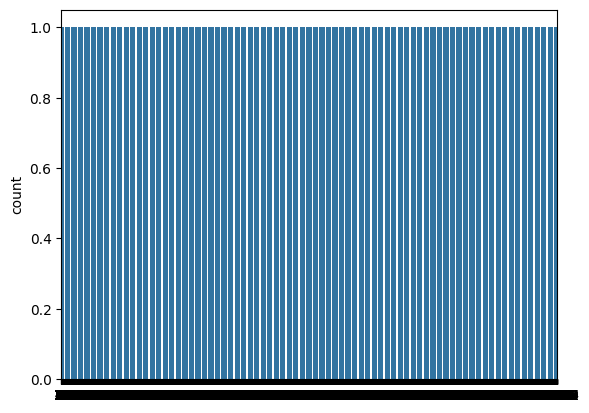

In [50]:
import seaborn as sns

sns.countplot(train_set['label'])

In [51]:
from imblearn.over_sampling import RandomOverSampler 

oversample = RandomOverSampler()

x_train,y_train  = oversample.fit_resample(x_train,y_train)

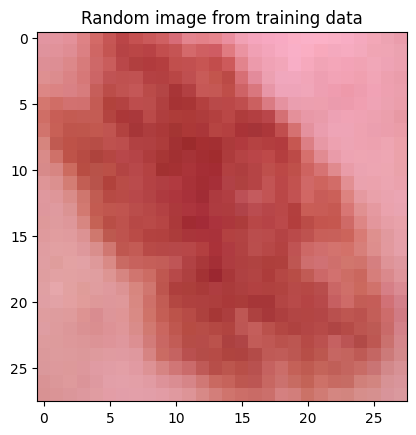

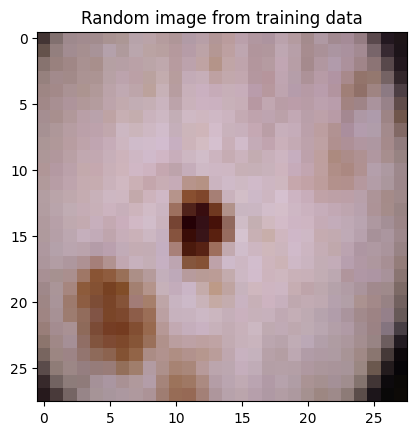

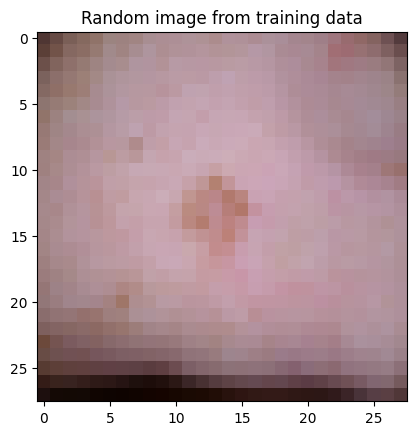

In [52]:
import matplotlib.pyplot as plt
import random

num=random.randint(0,8000)
x_train=np.array(x_train, dtype=np.uint8).reshape(-1,28,28,3)

plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()
num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

# Step 5: Model Building (CNN)

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import tensorflow as tf

In [54]:
#https://keras.io/api/models/sequential/
#https://keras.io/api/layers/core_layers/dense/
#https://keras.io/api/layers/merging_layers/add/
#https://keras.io/api/layers/convolution_layers/convolution2d
#https://keras.io/api/layers/convolution_layers/convolution2d
#https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization


%time 

model = Sequential()


model.add(Conv2D(16, 
                 kernel_size = (3,3), 
                 input_shape = (28, 28, 3), 
                 activation = 'relu', 
                 padding = 'same'))

model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(32, 
                 kernel_size = (3,3), 
                 activation = 'relu'))

model.add(Conv2D(64, 
                 kernel_size = (3,3), 
                 activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(128, 
                 kernel_size = (3,3), 
                 activation = 'relu'))

model.add(Conv2D(256, 
                 kernel_size = (3,3), 
                 activation = 'relu'))

model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(7,activation='softmax'))

model.summary()

CPU times: total: 0 ns
Wall time: 999 μs


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 14, 14, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 5, 5, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 1, 1, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 7)              │           23

 Total params: 504,103 (1.92 MB)

 Trainable params: 502,983 (1.92 MB)

 Non-trainable params: 1,120 (4.38 KB)

# Step 6: Setting Optimizer & Annealing

---



In [55]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model2.keras', 
                                              monitor='val_acc', 
                                              mode='max',
                                              verbose=1,
                                              save_best_only=True)


In [56]:
%time 

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer =optimizer,
              metrics = ['accuracy'])

CPU times: total: 0 ns
Wall time: 0 ns


# Step 7: Fitting the model

In [64]:
from datetime import datetime

start_time = datetime.now()

history = model.fit(x_train,
                    y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 50,
                    shuffle=True,
                    callbacks=[callback])

end_time = datetime.now()

print('Duration: {}'.format(end_time - start_time))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.9145 - loss: 0.3430 - val_accuracy: 0.8443 - val_loss: 0.4214
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9883 - loss: 0.0410 - val_accuracy: 0.9023 - val_loss: 0.2299
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.9899 - loss: 0.0318 - val_accuracy: 0.8565 - val_loss: 0.4346
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - accuracy: 0.9898 - loss: 0.0325 - val_accuracy: 0.9359 - val_loss: 0.1595
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.9910 - loss: 0.0285 - val_accuracy: 0.7572 - val_loss: 0.7884
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9894 - loss: 0.0333 - val_accuracy: 0.9468 - val_loss: 0.1538
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9886 - loss: 0.0359 - val_accuracy: 0.9247 - val_loss: 0.1934
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9937 - loss: 0.0212 - val_acc

# Step 8: Model Evaluation

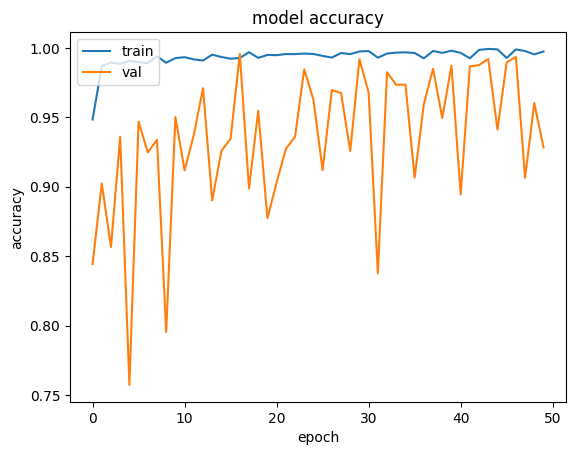

In [65]:
#plot of accuracy vs epoch

plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()

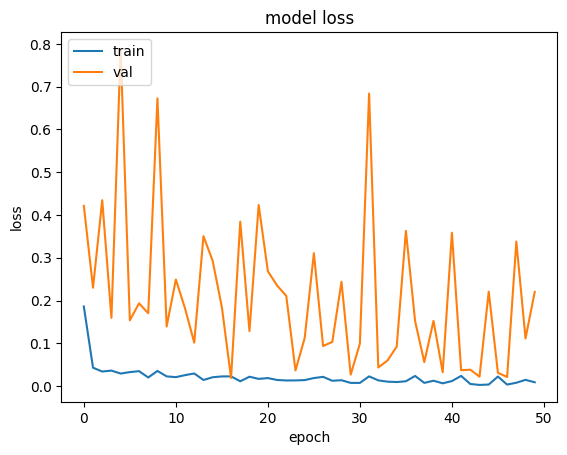

In [66]:
#plot of loss vs epoch

plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

plt.title('model loss')

plt.ylabel('loss')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()

In [67]:
model.save("my_model2.keras")

In [68]:
model.load_weights('my_model2.keras')

In [69]:
x_test=np.array(x_test).reshape(-1,28,28,3)

loss, acc = model.evaluate(x_test, y_test, verbose=2)

63/63 - 0s - 7ms/step - accuracy: 0.7983 - loss: 1.1214


In [70]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

conf_mat = confusion_matrix(y_test, y_pred)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [71]:
print(conf_mat)

[[  33   11    9    2   16    0    1]
 [   2   70    6    0   18    1    1]
 [   5    9  131    1   69    0    7]
 [   1    6    1    6    8    0    1]
 [   7   18   33    0 1253    0   37]
 [   1    4    0    0    8   11    0]
 [   5    2   22    0   92    0   95]]


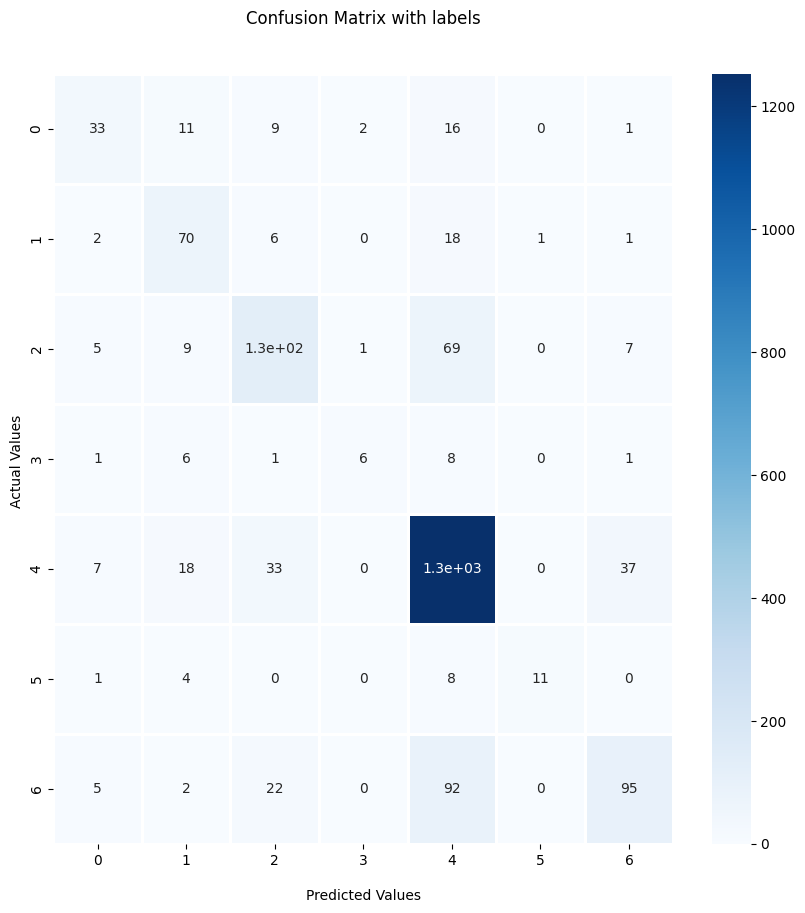

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10)) 


ax = sns.heatmap(conf_mat, annot=True, cmap='Blues', linewidths=.9, ax=ax)

ax.set_title('Confusion Matrix with labels\n\n');

ax.set_xlabel('\nPredicted Values')

ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6'])

ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6'])

plt.show()

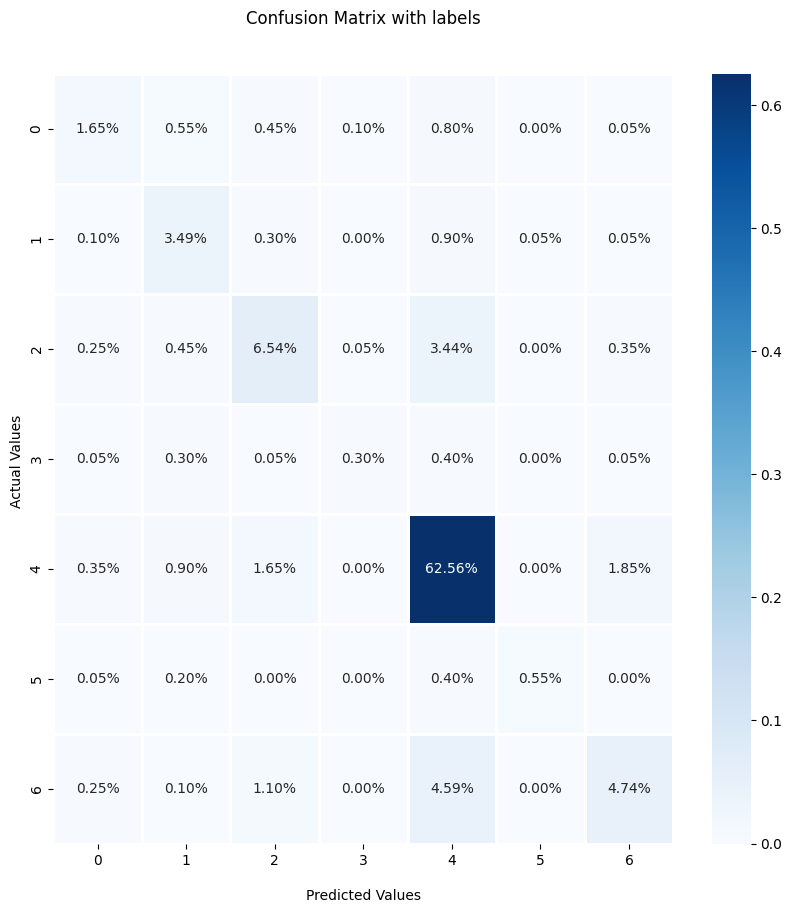

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10)) 


ax = sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, fmt='.2%', cmap='Blues', linewidths=.9, ax=ax)

ax.set_title('Confusion Matrix with labels\n\n');

ax.set_xlabel('\nPredicted Values')

ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6'])

ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6'])

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


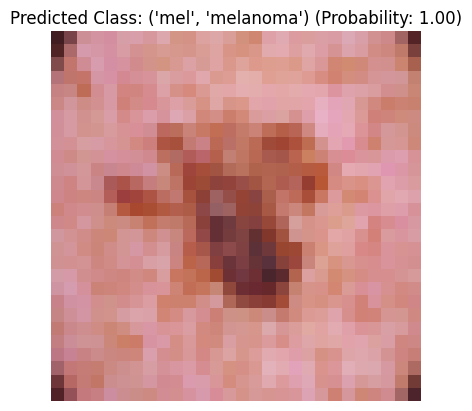

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import PIL

# Load and preprocess image
image_path = r"C:\Users\Kavya Maurya\OneDrive\Desktop\archive (2)\HAM10000_images_part_2\ISIC_0029308.jpg"
image = PIL.Image.open(image_path)
image = image.resize((28, 28))  # If your model requires this size
img = np.array(image).reshape(-1, 28, 28, 3)  

# Prediction
result = model.predict(img)  # Assuming 'model' is your trained model
result = result.tolist()
max_prob = max(result[0])
class_ind = result[0].index(max_prob)
predicted_class = classes[class_ind]  # Assuming 'classes' is your list of class names

# Display image with title
plt.figure()
plt.imshow(image)  # Show original, not resized image for better visual
plt.title(f"Predicted Class: {predicted_class} (Probability: {max_prob:.2f})")
plt.axis('off')  # Remove axis ticks
plt.show()
